In [6]:
import numpy as np
import matplotlib.pyplot as plt

L = 4e-6
W = 1e-6
Nx = 40
Ny = 10
dx = L / Nx
dy = W / Ny

N = int(1e4 * 0.14)
q = 1.6e-19
T = 300
Vsd = 0
total_time = 0.05e-9
dt = 0.005e-12
steps = int(total_time / dt)

m_eff = 9.11e-31
v_F = 1e6
E = Vsd / L
ax = q * E / m_eff

x = np.random.rand(N) * L
y = np.random.rand(N) * W

theta = 2 * np.pi * np.random.rand(N)
vx = v_F * np.cos(theta)
vy = v_F * np.sin(theta)

print("velocity increment: ", ax * dt)

velocity increment:  0.0


tau_e_e:  5e-14  tau_imp:  5e-11
Progress: 0.0%
Progress: 0.1%
Progress: 0.2%
Progress: 0.3%
Progress: 0.4%
Progress: 0.5%
Progress: 0.6%
Progress: 0.7%
Progress: 0.8%
Progress: 0.9%
Progress: 1.0%
Progress: 1.1%
Progress: 1.2%
Progress: 1.3%
Progress: 1.4%
Progress: 1.5%
Progress: 1.6%
Progress: 1.7%
Progress: 1.8%
Progress: 1.9%
Progress: 2.0%
Progress: 2.1%
Progress: 2.2%
Progress: 2.3%
Progress: 2.4%
Progress: 2.5%
Progress: 2.6%
Progress: 2.7%
Progress: 2.8%
Progress: 2.9%
Progress: 3.0%
Progress: 3.1%
Progress: 3.2%
Progress: 3.3%
Progress: 3.4%
Progress: 3.5%
Progress: 3.6%
Progress: 3.7%
Progress: 3.8%
Progress: 3.9%
Progress: 4.0%
Progress: 4.1%
Progress: 4.2%
Progress: 4.3%
Progress: 4.4%
Progress: 4.5%
Progress: 4.6%
Progress: 4.7%
Progress: 4.8%
Progress: 4.9%
Progress: 5.0%
Progress: 5.1%
Progress: 5.2%
Progress: 5.3%
Progress: 5.4%
Progress: 5.5%
Progress: 5.6%
Progress: 5.7%
Progress: 5.8%
Progress: 5.9%
Progress: 6.0%
Progress: 6.1%
Progress: 6.2%
Progress: 6.3%
Progres

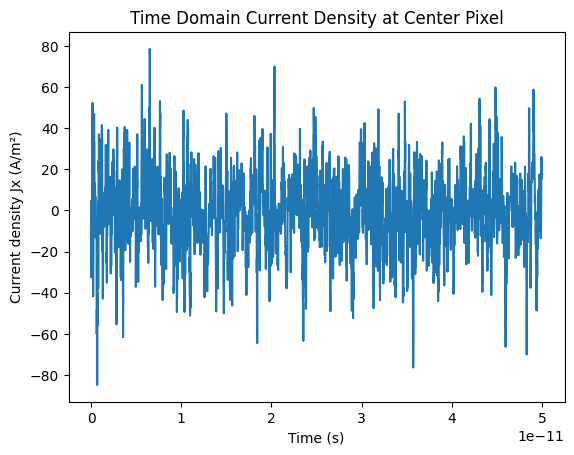

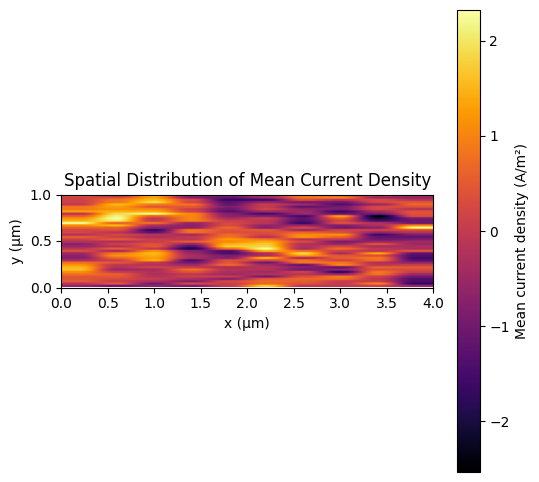

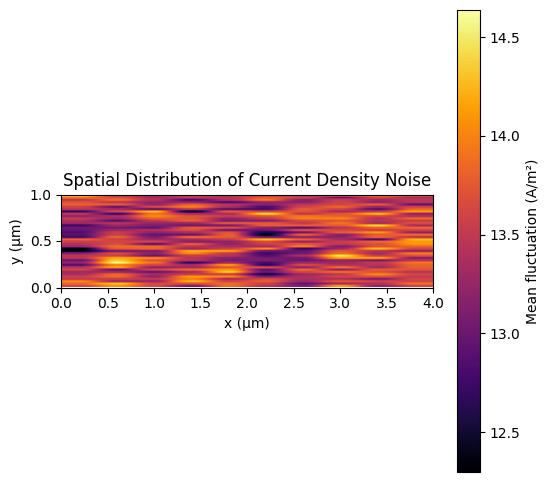

tau_e_e:  5e-14  tau_imp:  5e-14
Progress: 0.0%
Progress: 0.1%
Progress: 0.2%
Progress: 0.3%
Progress: 0.4%
Progress: 0.5%
Progress: 0.6%
Progress: 0.7%
Progress: 0.8%
Progress: 0.9%
Progress: 1.0%
Progress: 1.1%
Progress: 1.2%
Progress: 1.3%
Progress: 1.4%
Progress: 1.5%
Progress: 1.6%
Progress: 1.7%
Progress: 1.8%
Progress: 1.9%
Progress: 2.0%
Progress: 2.1%
Progress: 2.2%
Progress: 2.3%
Progress: 2.4%
Progress: 2.5%
Progress: 2.6%
Progress: 2.7%
Progress: 2.8%
Progress: 2.9%
Progress: 3.0%
Progress: 3.1%
Progress: 3.2%
Progress: 3.3%
Progress: 3.4%
Progress: 3.5%
Progress: 3.6%
Progress: 3.7%
Progress: 3.8%
Progress: 3.9%
Progress: 4.0%
Progress: 4.1%
Progress: 4.2%
Progress: 4.3%
Progress: 4.4%
Progress: 4.5%
Progress: 4.6%
Progress: 4.7%
Progress: 4.8%
Progress: 4.9%
Progress: 5.0%
Progress: 5.1%
Progress: 5.2%
Progress: 5.3%
Progress: 5.4%
Progress: 5.5%
Progress: 5.6%
Progress: 5.7%
Progress: 5.8%
Progress: 5.9%
Progress: 6.0%
Progress: 6.1%
Progress: 6.2%
Progress: 6.3%
Progres

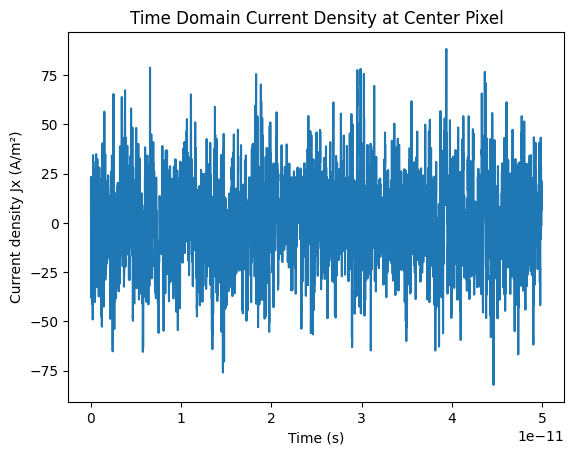

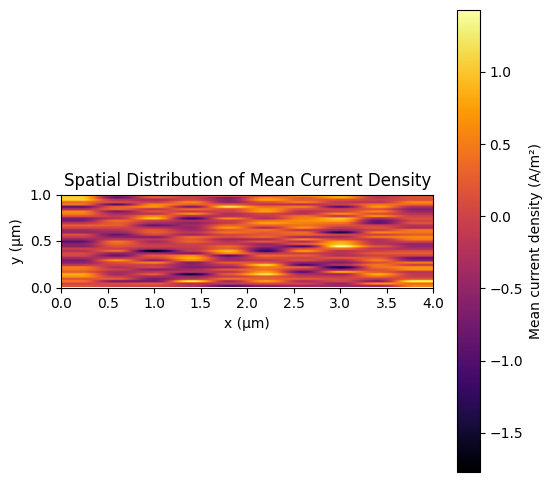

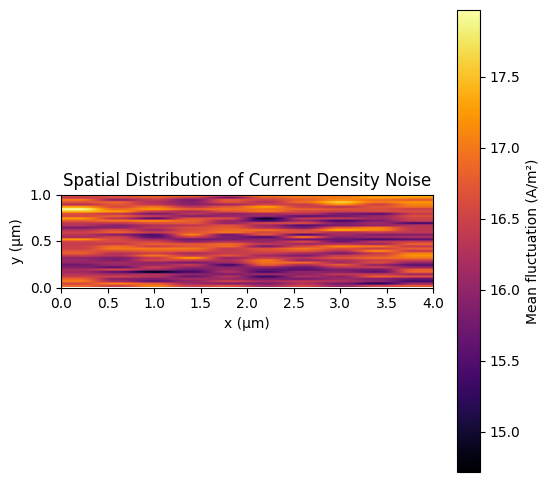

In [7]:
for tau_e_e, tau_imp in zip([0.05e-12, 0.05e-12], [50e-12, 0.05e-12]):

    print("tau_e_e: ", tau_e_e, " tau_imp: ", tau_imp)

    Jx_grid = np.zeros((Nx, Ny, steps))

    for step in range(steps):
        vx += ax * dt
        x += vx * dt
        y += vy * dt

        # Boundary Conditions
        out_right = x >= L
        if np.any(out_right):
            x[out_right] = 0
            y[out_right] = np.random.rand(np.sum(out_right)) * W
            phi = 2 * np.pi * np.random.rand(np.sum(out_right))
            vx[out_right] = v_F * np.cos(phi)
            vy[out_right] = v_F * np.sin(phi)
        out_left = x < 0
        if np.any(out_left):
            x[out_left] = L
            y[out_left] = np.random.rand(np.sum(out_left)) * W
            phi = 2 * np.pi * np.random.rand(np.sum(out_left))
            vx[out_left] = v_F * np.cos(phi)
            vy[out_left] = v_F * np.sin(phi)

        above = y > W
        below = y < 0
        vy[above] *= -1
        y[above] = 2 * W - y[above]
        vy[below] *= -1
        y[below] = -y[below]

        # Calculate grid indices
        ix_indices = np.clip((x / dx).astype(int), 0, Nx - 1)
        iy_indices = np.clip((y / dy).astype(int), 0, Ny - 1)
        contributions = q * vx / (dx * dy)
        np.add.at(Jx_grid[:, :, step], (ix_indices, iy_indices), contributions)

        # Electron-Impurity Scattering
        scatter_prob = dt / tau_imp
        scatter_events = np.random.rand(N) < scatter_prob
        if np.any(scatter_events):
            phi = 2 * np.pi * np.random.rand(np.sum(scatter_events))
            vx[scatter_events] = v_F * np.cos(phi)
            vy[scatter_events] = v_F * np.sin(phi)

        # Electron-Electron Scattering
        coll_prob = dt / tau_e_e
        cell_ix = np.clip((x / dx).astype(int), 0, Nx - 1)
        cell_iy = np.clip((y / dy).astype(int), 0, Ny - 1)

        for ix in range(Nx):
            for iy in range(Ny):
                cell_indices = np.where((cell_ix == ix) & (cell_iy == iy))[0]
                np.random.shuffle(cell_indices)  # Randomize order for pairing
                # include neighboring cell interactions
                # neighbor_mask = ((cell_ix >= ix-1) & (cell_ix <= ix+1) &
                #                  (cell_iy >= iy-1) & (cell_iy <= iy+1))
                # cell_indices = np.where(neighbor_mask)[0]
                for j in range(0, len(cell_indices) - 1, 2):
                    i1, i2 = cell_indices[j], cell_indices[j + 1]
                    if np.random.rand() < coll_prob:
                        v1 = np.array([vx[i1], vy[i1]])
                        v2 = np.array([vx[i2], vy[i2]])
                        V_cm = 0.5 * (v1 + v2)
                        u = v1 - v2
                        u_mag = np.linalg.norm(u)
                        if u_mag > 1e-12:
                            phi = 2 * np.pi * np.random.rand()
                            u_rot = u_mag * np.array([np.cos(phi), np.sin(phi)])
                            vx[i1], vy[i1] = V_cm + 0.5 * u_rot
                            vx[i2], vy[i2] = V_cm - 0.5 * u_rot

        if step % (steps // 1000) == 0:
            print(f"Progress: {100*step/steps:.1f}%")

    # Jx along time at the center cell.
    center_ix = int(Nx / 1.5)
    center_iy = int(Ny / 2)
    plt.figure()
    plt.plot(np.arange(steps) * dt, Jx_grid[center_ix, center_iy, :])
    plt.xlabel("Time (s)")
    plt.ylabel("Current density Jx (A/m²)")
    plt.title("Time Domain Current Density at Center Pixel")
    plt.show()

    # Mean spatial distribution of current density
    mean_Jx = np.mean(Jx_grid, axis=2)
    plt.figure(figsize=(6, 6))
    plt.imshow(mean_Jx, cmap="inferno", origin="lower", extent=[0, L * 1e6, 0, W * 1e6])
    plt.colorbar(label="Mean current density (A/m²)")
    plt.xlabel("x (μm)")
    plt.ylabel("y (μm)")
    plt.title("Spatial Distribution of Mean Current Density")
    plt.show()

    # Spatial distribution of current density noise
    Jx_fluctuations = Jx_grid - np.mean(Jx_grid, axis=2, keepdims=True)
    Jx_fluctuations_time_average = np.mean(np.abs(Jx_fluctuations), axis=2)
    plt.figure(figsize=(6, 6))
    plt.imshow(
        Jx_fluctuations_time_average,
        cmap="inferno",
        origin="lower",
        extent=[0, L * 1e6, 0, W * 1e6],
    )
    plt.colorbar(label="Mean fluctuation (A/m²)")
    plt.xlabel("x (μm)")
    plt.ylabel("y (μm)")
    plt.title("Spatial Distribution of Current Density Noise")
    plt.show()

    np.save(f"Jx_tee{tau_e_e}_timp{tau_imp}_short_low_n.npy", Jx_grid)